In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [ ]:
base_dir = '/gdrive/MyDrive/training'

In [ ]:
EPOCHS=20

In [ ]:
cd /gdrive/MyDrive/training

/gdrive/MyDrive/training


In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        #class_mode='sparse',
        shuffle=True,
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        #class_mode='sparse',
        subset='validation')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=None,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=None,
    verbose=2
)

Epoch 1/20
8/8 - 7s - loss: 0.1735 - accuracy: 0.9250 - val_loss: 0.2832 - val_accuracy: 0.9000 - 7s/epoch - 926ms/step
Epoch 2/20
8/8 - 7s - loss: 0.1584 - accuracy: 0.9458 - val_loss: 0.2723 - val_accuracy: 0.8833 - 7s/epoch - 866ms/step
Epoch 3/20
8/8 - 8s - loss: 0.1008 - accuracy: 0.9667 - val_loss: 0.3129 - val_accuracy: 0.9000 - 8s/epoch - 961ms/step
Epoch 4/20
8/8 - 7s - loss: 0.0549 - accuracy: 0.9833 - val_loss: 0.2608 - val_accuracy: 0.9167 - 7s/epoch - 813ms/step
Epoch 5/20
8/8 - 9s - loss: 0.0549 - accuracy: 0.9917 - val_loss: 0.1792 - val_accuracy: 0.9333 - 9s/epoch - 1s/step
Epoch 6/20
8/8 - 6s - loss: 0.0518 - accuracy: 0.9875 - val_loss: 0.2536 - val_accuracy: 0.9000 - 6s/epoch - 807ms/step
Epoch 7/20
8/8 - 9s - loss: 0.0224 - accuracy: 0.9917 - val_loss: 0.1850 - val_accuracy: 0.9167 - 9s/epoch - 1s/step
Epoch 8/20
8/8 - 7s - loss: 0.0210 - accuracy: 0.9958 - val_loss: 0.1759 - val_accuracy: 0.9500 - 7s/epoch - 813ms/step
Epoch 9/20
8/8 - 8s - loss: 0.0188 - accuracy:

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

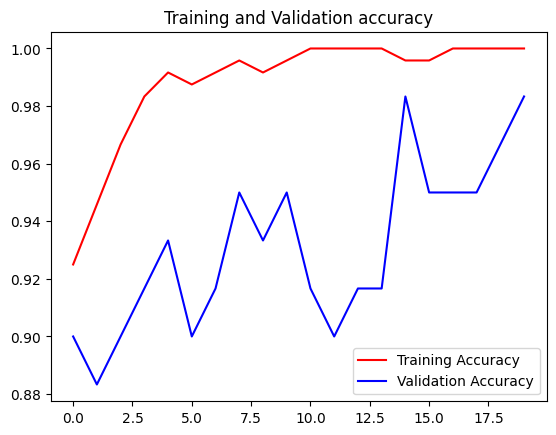

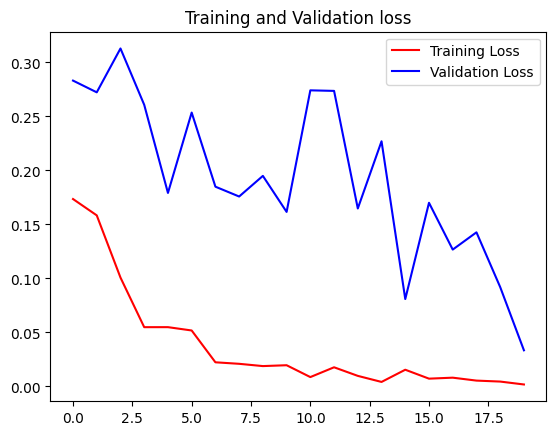

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Assuming you have a variable named 'history' that contains the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']  # Fixed typo: 'val loss' to 'val_loss'

epochs = range(len(acc))

# Plotting Training and Validation Accuracy
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='best')
plt.show()

# Plotting Training and Validation Loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')  # Fixed typo: 'accuracy' to 'loss'
plt.legend(loc='best')
plt.show()


Saving photo1653972069.jpeg to photo1653972069.jpeg
1/1 [==============================] - 0s 19ms/step
photo1653972069.jpeg
100


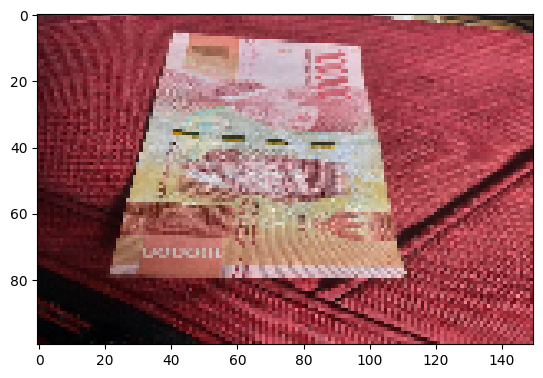

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('10')
  elif classes[0][1]==1:
    print('100')
  elif classes[0][2]==1:
    print('50')
  else:
    print('unknown')